In [10]:
import numpy as numpy
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN


In [11]:
# Data Preperation
X, y_true= make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

In [12]:
# Create Dataframe
df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'y_true': y_true})
df.head()

,x1,x2,y_true
0,-6.596339,-7.139015,2
1,-6.137532,-6.580817,2
2,5.198206,2.049175,1
3,-2.968559,8.164442,0
4,-2.768789,7.511143,0


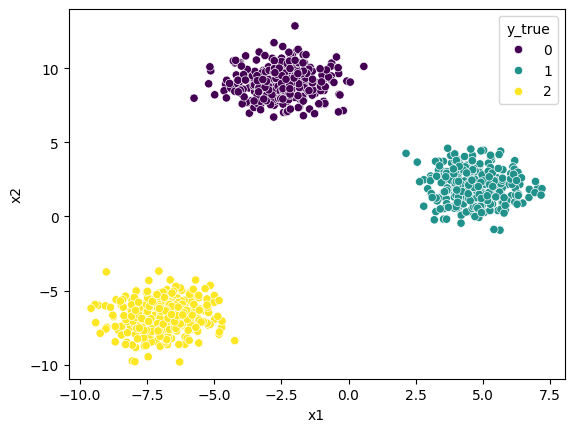

In [13]:

sns.scatterplot(x='x1', y='x2', hue ='y_true', palette='viridis', data=df)
plt.show()

In [8]:
#Model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

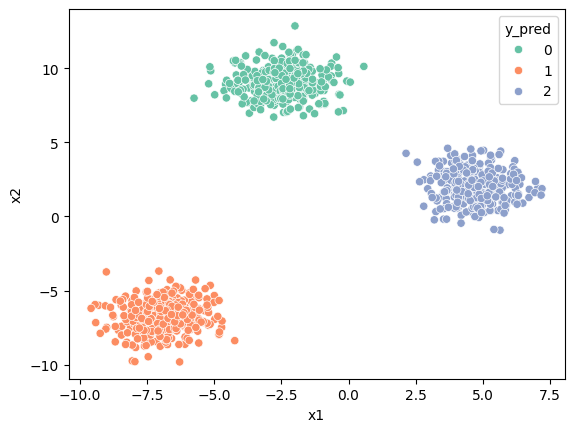

In [9]:
df['y_pred'] = kmeans.labels_
sns.scatterplot(x='x1', y='x2', hue='y_pred', palette='Set2', data=df)
plt.show()

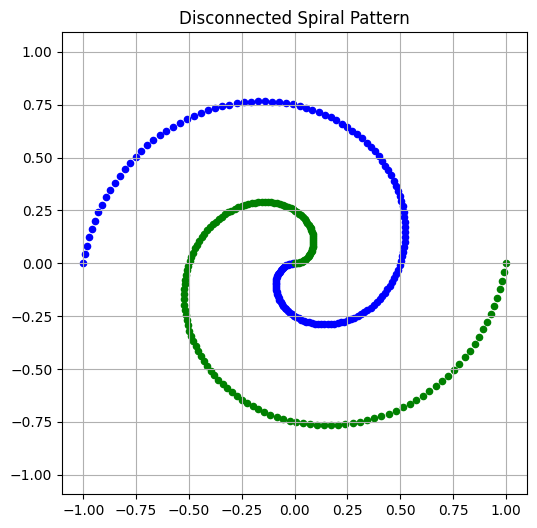

          x         y color
0 -0.000000  0.000000  blue
1 -0.006705 -0.000283  blue
2 -0.013375 -0.001131  blue
3 -0.019973 -0.002540  blue
4 -0.026465 -0.004507  blue


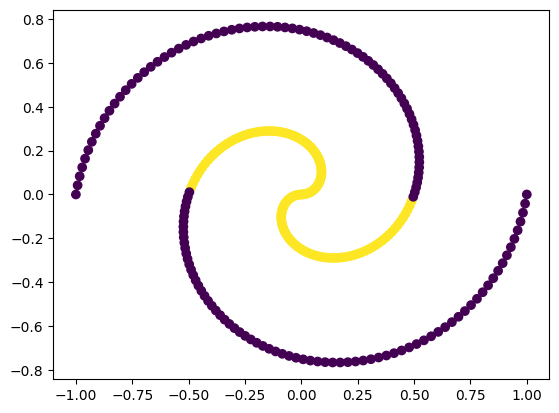

In [14]:
#%% packages
from sklearn.cluster import DBSCAN

#%% data preparation
# create a dataset with 2 dueling spirals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_disconnected_spirals(n_points=100):
    # Generate parameter t for each spiral arm
    t1 = np.linspace(0, 2*np.pi, n_points)  # Blue spiral
    t2 = np.linspace(0, 2*np.pi, n_points)  # Green spiral
    
    # Create first spiral (blue, top)
    x1 = t1 * np.cos(t1 + np.pi) / (2*np.pi)
    y1 = t1 * np.sin(t1 + np.pi) / (2*np.pi)
    
    # Create second spiral (green, bottom)
    x2 = t2 * np.cos(t2) / (2*np.pi)
    y2 = t2 * np.sin(t2) / (2*np.pi)
    
    # Create DataFrame for first spiral
    df1 = pd.DataFrame({
        'x': x1,
        'y': y1,
        'color': 'blue'
    })
    
    # Create DataFrame for second spiral
    df2 = pd.DataFrame({
        'x': x2,
        'y': y2,
        'color': 'green'
    })
    
    # Combine the DataFrames
    df = pd.concat([df1, df2], ignore_index=True)
    
    return df

# Create the data
df = create_disconnected_spirals(150)

# Create the plot
plt.figure(figsize=(6, 6))
for color in ['blue', 'green']:
    mask = df['color'] == color
    plt.scatter(df.loc[mask, 'x'], 
               df.loc[mask, 'y'],
               c=color, 
               s=20)

plt.axis('equal')
plt.grid(True)
plt.title('Disconnected Spiral Pattern')
plt.show()

# Display first few rows of the DataFrame
print(df.head())
# %% model DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(df[['x', 'y']])
# %% visualize the model results
df['y_pred'] = dbscan.labels_
plt.scatter(df['x'], df['y'], c=df['y_pred'], cmap='viridis')
plt.show()
# %%
